In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/Colab\ Notebooks/S5

/content/drive/My Drive/Colab Notebooks/S5


In [0]:
import lib_data as data
import lib_model as model
import lib_eval as eval
import pickle as pk
import pandas as pd
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt
from tqdm import *
from pylab import *
from multiprocessing import Pool
import pickle
import scipy.stats
from scipy.linalg import qr, solve, lstsq
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
#from mpl_toolkits.basemap import Basemap

#I. Model Evaluation on Temperature prediction - GULFSTREAM




## Load Dataset


In [0]:
# Load the data
X_train_gs_100 = pd.read_pickle("x_train_gs_100.pkl")
y_train_gs_100 = pd.read_pickle("y_train_gs_100.pkl")
nor_gs_100_train = True

## Experience 1 - GS 100 



In [0]:
min_class1 = 3
max_class1 = 7
iter_EM1 = 150
method1 = "kmeans"
nb_inter1 = 15
nb_features1 = X_train_gs_100.shape[1]
y_temp_train1 = y_train_gs_100[:,0].reshape(y_train_gs_100.shape[0],1)
n_targets1 = 1

In [0]:
# save info of the test
E1_info = {}
E1_info["min_class"] = 3
E1_info["max_class"] = 7
E1_info["iter_EM"] = 150
E1_info["method"] = "kmeans"
E1_info["nb_inter"] = 15
E1_info["n_target"] = 1
feature_mean = np.mean(X_train_gs_100, axis=0)
feature_mean[0] = 0
E1_info["feature_mean"] = feature_mean
feature_std = np.std(X_train_gs_100, axis=0)
feature_std[0] = 1
E1_info["feature_std"] = feature_std
output = open('E1_info.pkl', 'wb')
pickle.dump(E1_info, output)
output.close()

In [0]:
if nor_gs_100_train:
  X_train_gs_100[:,1:] = model.data_stdliz(X_train_gs_100[:,1:])
  nor_gs_100_train = False

In [0]:
nb_class1, inputs1 = model.input_data(X_train_gs_100,y_temp_train1, min_class1, max_class1, iter_EM1, method1, nb_inter1)

In [0]:
# train model
model.model_GPU(inputs1, nb_class1, nb_inter1, iter_EM1, nb_features1, n_targets1, nb = 1,save = True, al_targ = True)

### E1 - Evaluate train set - GS 100 


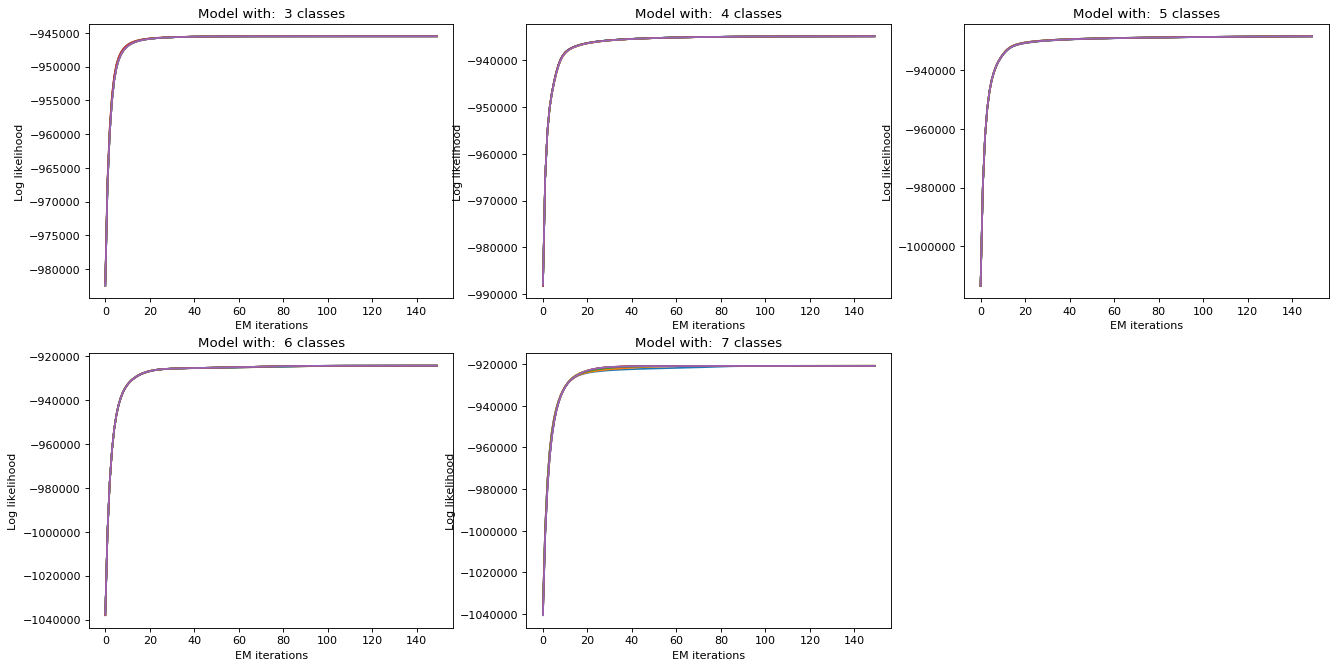

In [0]:
Log_1 = np.loadtxt('Log_E1.txt').reshape(len(nb_class1),nb_inter1,iter_EM1)
eval.likli_plot(Log_1,3,2,nb_class1,nb_inter1,iter_EM1)

In [0]:
Beta1_ = np.loadtxt("Beta_E1.txt").reshape(len(nb_class1),np.sum(np.asarray(nb_class1)),nb_features1,n_targets1)
Sigma1_ = np.loadtxt("Sigma_E1.txt").reshape(len(nb_class1),np.sum(np.asarray(nb_class1)),n_targets1,n_targets1)
Lamda1_ = np.loadtxt("Lamda_E1.txt").reshape(len(nb_class1),np.sum(np.asarray(nb_class1)),1)

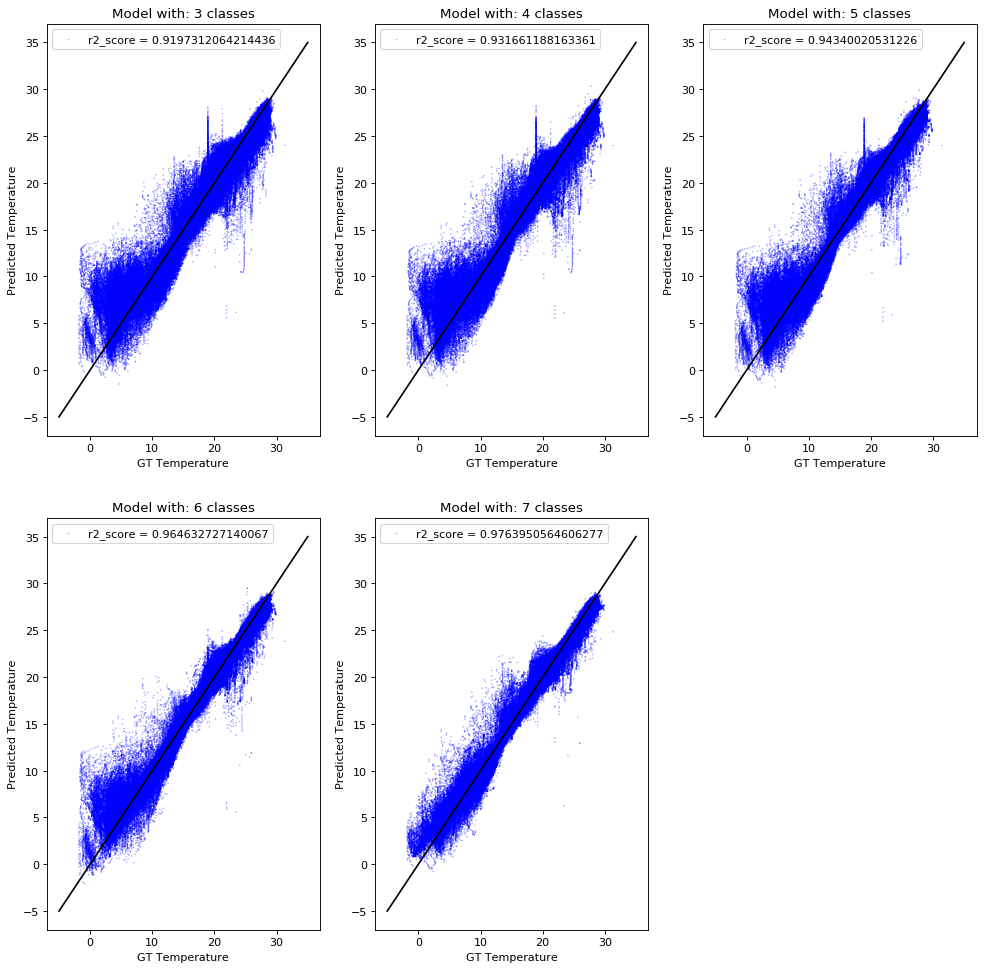

In [11]:
eval.y_eval(Beta1_,Sigma1_,Lamda1_,X_train_gs_100,y_temp_train1,nb_class1,3,2,save = 5,nb = 1, test = False)

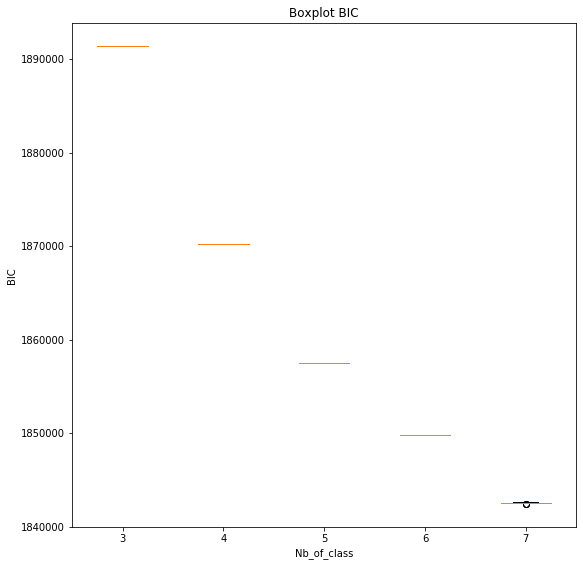

In [0]:
bic = np.loadtxt('BIC_E1.txt')
eval.bic_box(bic,nb_class1)

In [0]:
beta1_5,sigma1_5,lambda1_5 = eval.extract_bsl(Beta1_,Sigma1_,Lamda1_,X_train_gs_100,y_temp_train1,nb_class1,5,1)

In [0]:
eval.pi_hat(X_train_gs_100,y_temp_train1,beta1_5,sigma1_5,lambda1_5,X_train_gs_100.shape[0],nb = 1,th_class = 5, test = False)

### E1 - Evaluate test set - GS 100 


In [0]:
# Load the test data
X_test_gs_100 = pd.read_pickle("x_test_gs_100.pkl")
y_test_gs_100 = pd.read_pickle("y_test_gs_100.pkl")
nor_gs_100_test = True

In [0]:
if nor_gs_100_test:
  X_test_gs_100[:,1:] = model.data_stdliz(X_test_gs_100[:,1:])
  nor_gs_100_test = False

In [0]:
y_temp_test1 = y_test_gs_100[:,0].reshape(y_test_gs_100.shape[0],1)

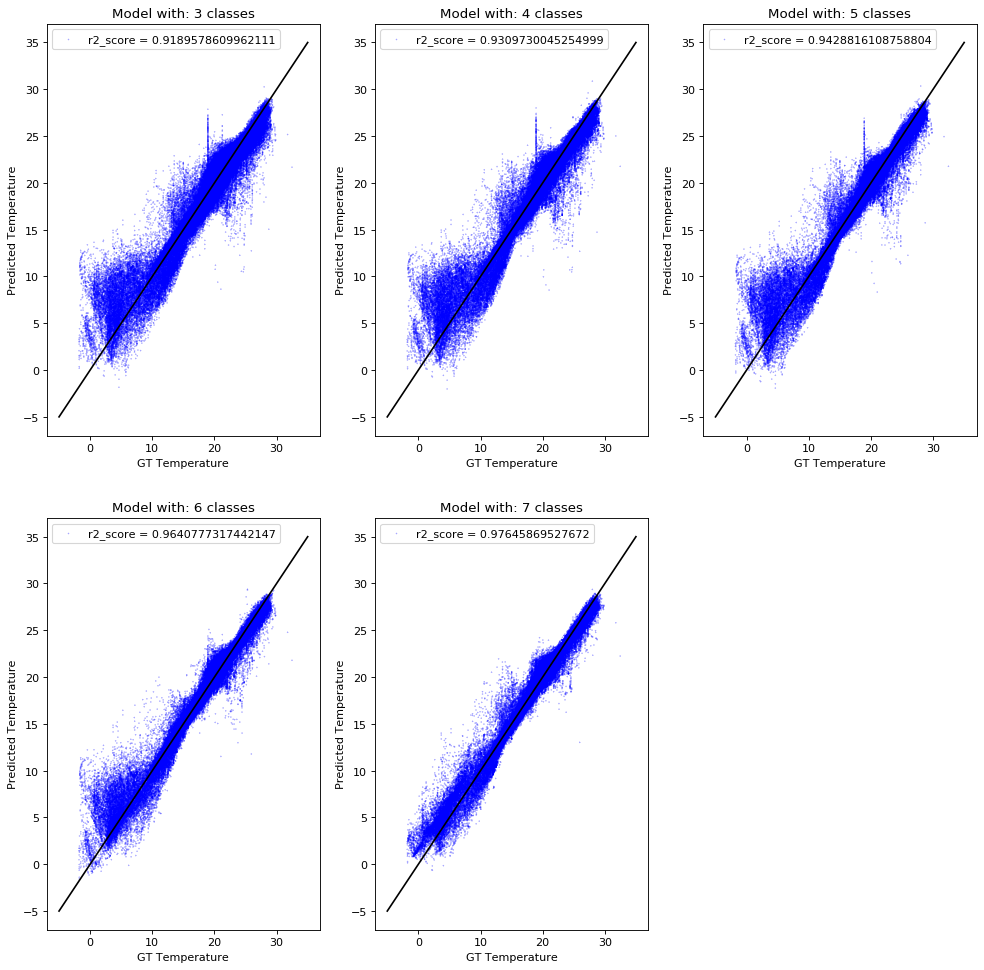

In [17]:
eval.y_eval(Beta1_,Sigma1_,Lamda1_,X_test_gs_100,y_temp_test1,nb_class1,3,2,save = 5,nb = 1, test = True)

In [0]:
eval.pi_hat(X_test_gs_100,y_temp_test1,beta1_5,sigma1_5,lambda1_5,X_test_gs_100.shape[0],nb = 1,th_class = 5, test = True)

#II. Model Evaluation on Temperature prediction - KUROSHIO


In [0]:
x_train_KS_p_100_10 = pd.read_pickle("x_train-KS-p_100-10.pkl")
y_train_KS_p_100_10 = pd.read_pickle("y_train-KS-p_100-10.pkl")
nor_train_KS_100_10 = True

In [0]:
min_class2 = 3
max_class2 = 7
iter_EM2 = 80
method2 = "kmeans"
nb_inter2 = 15
nb_features2 = x_train_KS_p_100_10.shape[1]
y_temp_train2 = y_train_KS_p_100_10[:,0].reshape(y_train_KS_p_100_10.shape[0],1)
n_targets2 = 1

In [0]:
# save info of the test
E2_info = {}
E2_info["min_class"] = 3
E2_info["max_class"] = 7
E2_info["iter_EM"] = 80
E2_info["method"] = "kmeans"
E2_info["nb_inter"] = 15
E2_info["n_target"] = 1
feature_mean = mean(x_train_KS_p_100_10, axis=0)
feature_mean[0] = 0
E2_info["feature_mean"] = feature_mean
feature_std = std(x_train_KS_p_100_10, axis=0)
feature_std[0] = 1
E2_info["feature_std"] = feature_std
output = open('E2_info.pkl', 'wb')
pickle.dump(E2_info, output)
output.close()

In [0]:
if nor_train_KS_100_10:
  x_train_KS_p_100_10[:,1:] = model.data_stdliz(x_train_KS_p_100_10[:,1:])
  nor_train_KS_100_10 = False

In [0]:
nb_class2, inputs2 = model.input_data(x_train_KS_p_100_10,y_temp_train2, min_class2, max_class2, iter_EM2, method2, nb_inter2)

In [0]:
# train model
model.model_GPU(inputs2, nb_class2, nb_inter2, iter_EM2, nb_features2, n_targets2, nb = 2,save = True, al_targ = True)

### E2 - Evaluate train set - KS 100 10

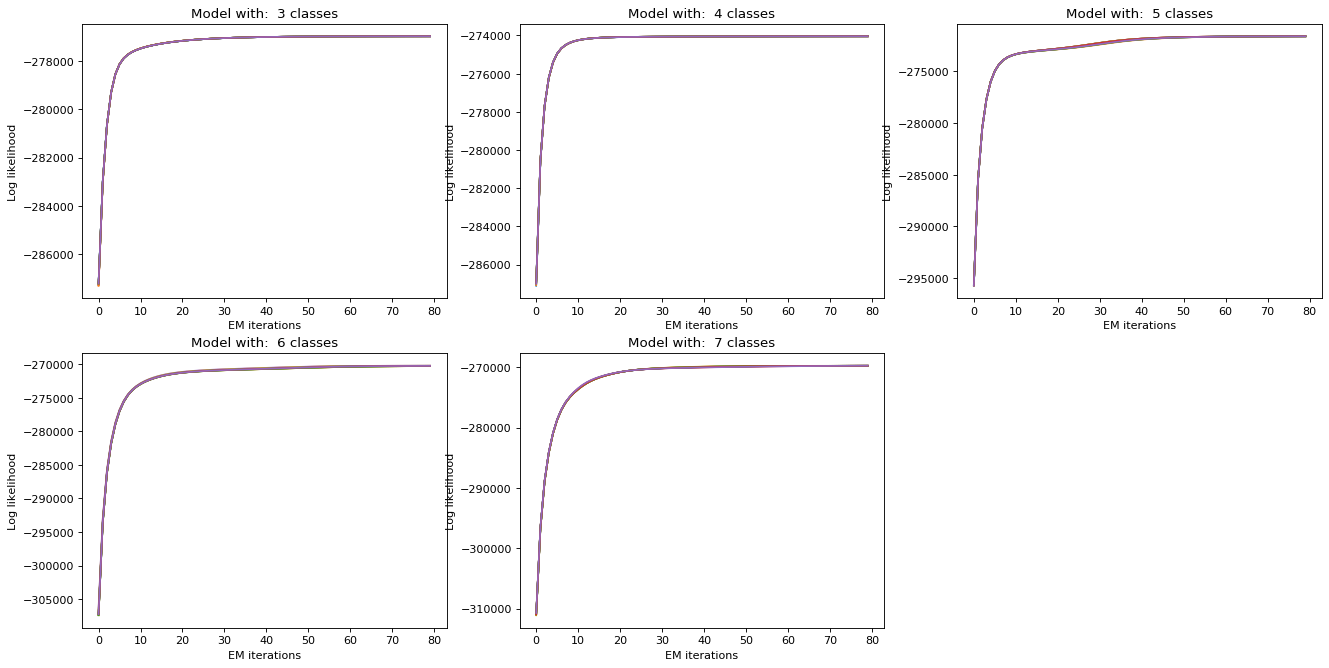

In [35]:
Log_E2 = np.loadtxt('Log_E2.txt').reshape(len(nb_class2),nb_inter2,iter_EM2)
eval.likli_plot(Log_E2,3,2,nb_class2,nb_inter2,iter_EM2)

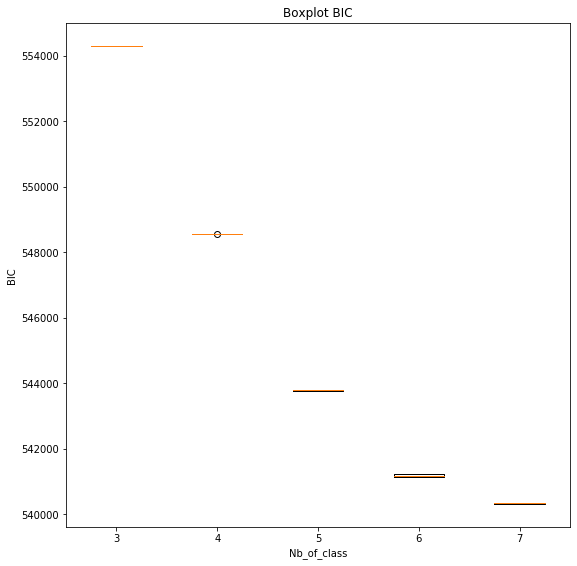

In [36]:
bic = np.loadtxt('BIC_E2.txt')
eval.bic_box(bic,nb_class2)

In [0]:
Beta2_ = np.loadtxt("Beta_E2.txt").reshape(len(nb_class2),np.sum(np.asarray(nb_class2)),nb_features2,n_targets2)
Sigma2_ = np.loadtxt("Sigma_E2.txt").reshape(len(nb_class2),np.sum(np.asarray(nb_class2)),n_targets2,n_targets2)
Lamda2_ = np.loadtxt("Lamda_E2.txt").reshape(len(nb_class2),np.sum(np.asarray(nb_class2)),1)

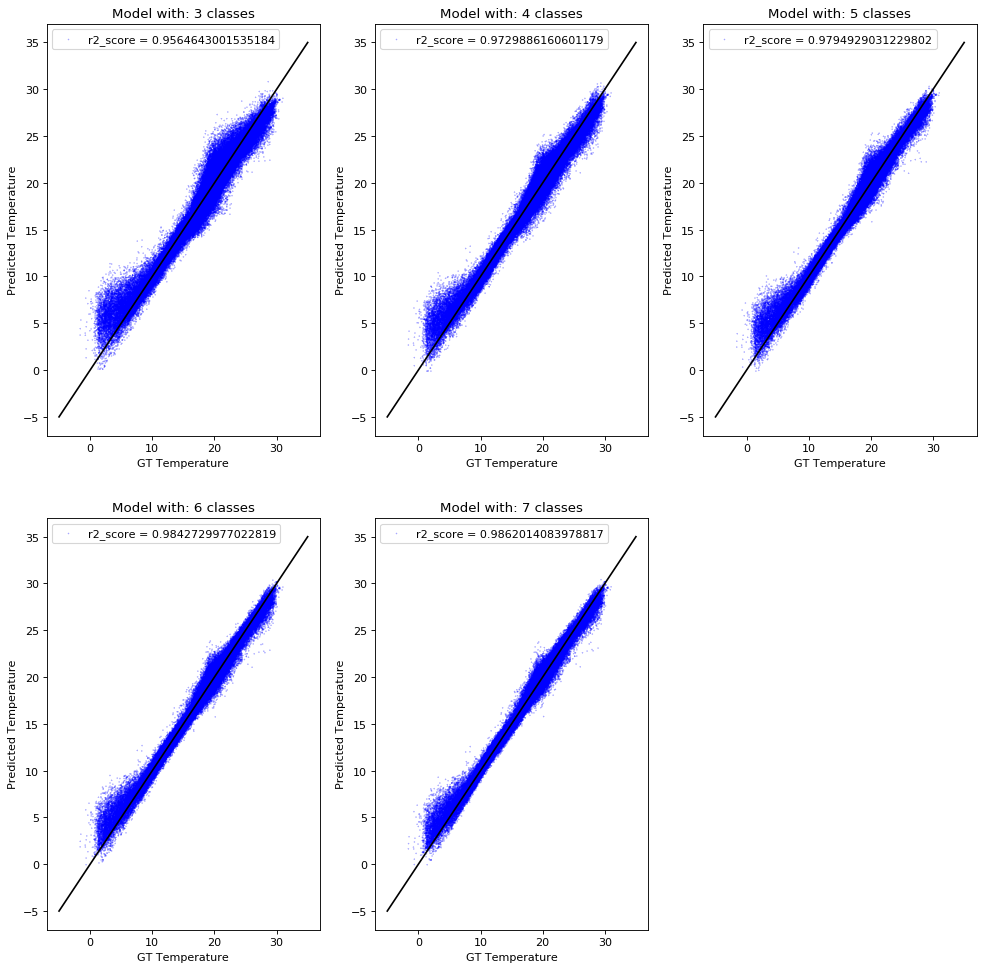

In [41]:
eval.y_eval(Beta2_,Sigma2_,Lamda2_,x_train_KS_p_100_10,y_temp_train2,nb_class2,3,2,save = 5,nb = 2, test = False)

In [0]:
beta2_5,sigma2_5,lambda2_5 = eval.extract_bsl(Beta2_,Sigma2_,Lamda2_,x_train_KS_p_100_10,y_temp_train2,nb_class2,th_class = 5, nb = 2)

In [0]:
eval.pi_hat(x_train_KS_p_100_10,y_temp_train2,beta2_5,sigma2_5,lambda2_5,x_train_KS_p_100_10.shape[0],nb = 2,th_class = 5, test = False)

### E2 - Evaluate test set - KS 100 10

In [0]:
x_test_KS_p_100_10 = pd.read_pickle("x_test-KS-p_100-10.pkl")
y_test_KS_p_100_10 = pd.read_pickle("y_test-KS-p_100-10.pkl")
nor_test_KS_100_10 = True

In [0]:
if nor_test_KS_100_10:
  x_test_KS_p_100_10[:,1:] = model.data_stdliz(x_test_KS_p_100_10[:,1:])
  nor_test_KS_100_10 = False

In [0]:
y_temp_test2 = y_test_KS_p_100_10[:,0].reshape(y_test_KS_p_100_10.shape[0],1)

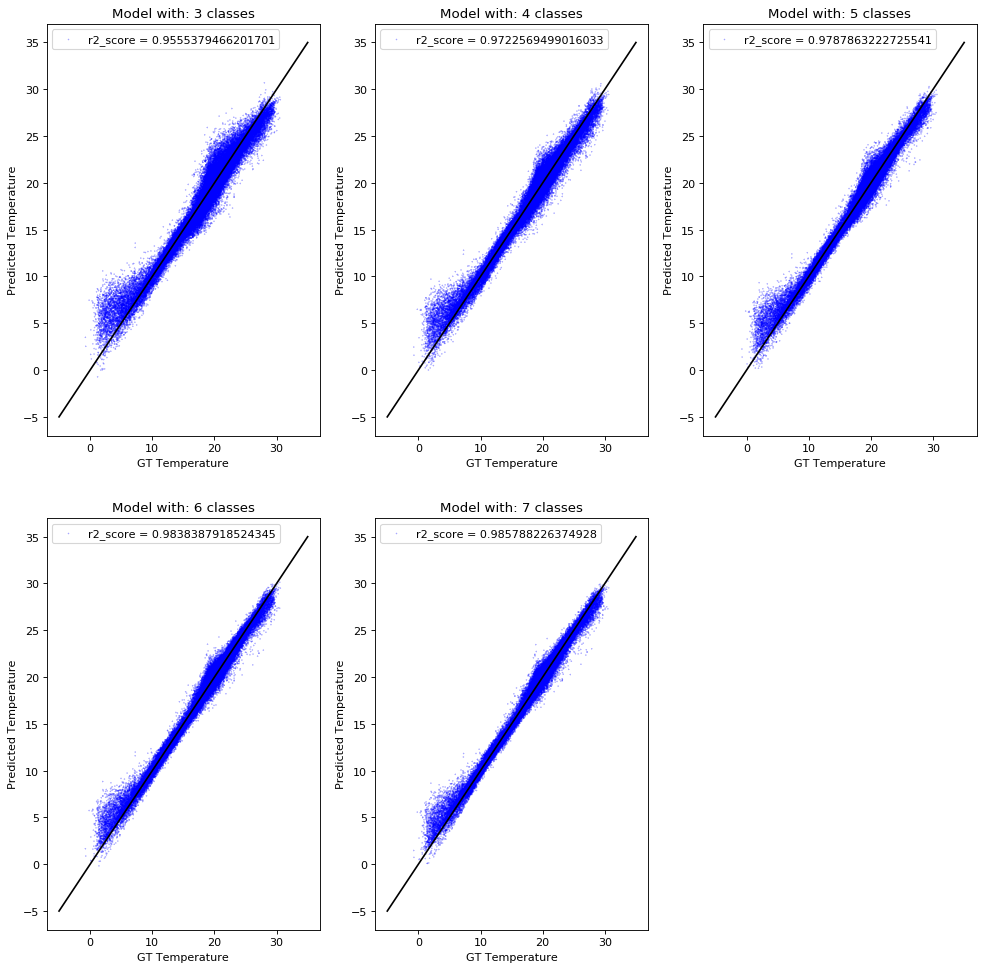

In [52]:
eval.y_eval(Beta2_,Sigma2_,Lamda2_,x_test_KS_p_100_10,y_temp_test2,nb_class2,3,2,save = 5,nb = 2, test = True)

In [0]:
eval.pi_hat(x_test_KS_p_100_10,y_temp_test2,beta2_5,sigma2_5,lambda2_5,x_test_KS_p_100_10.shape[0],nb = 2,th_class = 5, test = True)